<a href="https://colab.research.google.com/github/kunalNbadgujar/YES-BANK-STOCK-CLOSING-PRICE-PREDICTION/blob/main/team_YESBANK_STOCK_CLOSING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 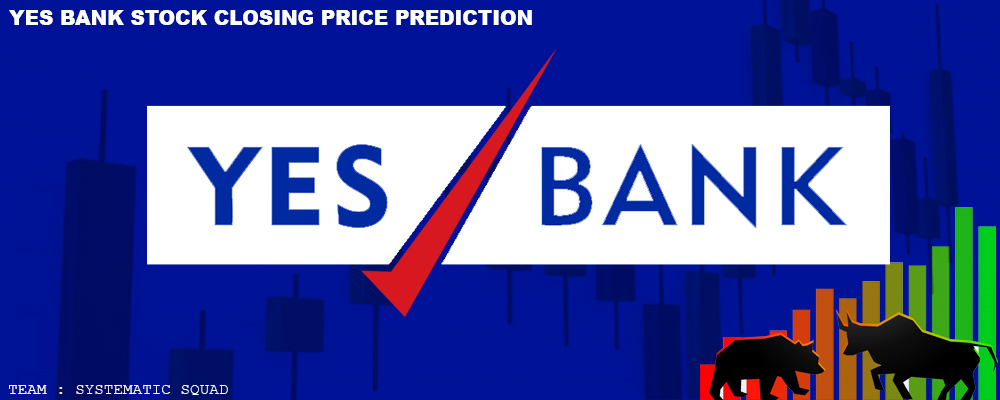

# **YES BANK STOCK CLOSING PRICE PREDICTION**

##### **Project Type** .......................   - **Regression**
##### **Contribution**  ........................ - Team     (systematic Squad) 
##### **Team Member 1 -**.................................- Kunal Badgujar
##### **Team Member 2 -**.................................- Aarti Gade
##### **Team Member 3 -**.................................- Vivek Tanagawade


# **Project Summary -**

Rana Kapoor was the co-founder and CEO of the bank. When Prime Minister Atal Bihari Vajpayee’s government was reforming at a rapid speed between 2002 and 2003, before the ‘India Shining’ period of 2004, they opened up bank licensing to the private sector. Kapoor and his brother-in-law, Ashok Kapur, got the license in 2003, and Yes Bank was launched on 21 January 2004.

Yes Bank’s decline started almost immediately after its peak. The peak made Rana brash, and he began lending to people who were under stress, including the Anil Ambani Group, Dewan Housing Finance Corporation Ltd, and the Zee Group.

As these debts started to pile up, (then RBI governor) Raghuram Rajan began his clean-up of the banking sector. His tenure was between 2013 and 2016, and he had figured that banks were understating their NPAs. The government and banks were unhappy with this, thinking he was revealing too much about the underbelly of credit systems.

His successor, Urjit Patel, was even tougher on the issue. More and more muck came out of the banks. The RBI found, year after year, a divergence between what Yes Bank’s claims about its NPAs and what the RBI calculated. With every passing quarter, the bank was forced to concede more and more NPAs.

In August 2018, the RBI refused to extend Rana Kapoor’s three-year tenure. By January 2019, a new CEO had been instituted. Everytime the bank tried to raise its capital by selling shares, more ugly truths about the balance sheet emerged, pushing prices further down.

# **GitHub Link -**

https://github.com/kunalNbadgujar/YES-BANK-STOCK-CLOSING-PRICE-PREDICTION

### **PROBLEM STATEMENT**

 Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly

 stock prices of the bank since its inception and includes closing, starting, highest, and lowest

 stock prices of every month. The main objective is to predict the stock’s closing price of the month.


---



**We have Yes Bank monthly stock price dataset. It has following features (Column)**:

 **1) Open** : Opening price of the stock of particular day

 **2) High** : It's the highest price at which a stock traded during a period

 **3) Low** : It's the lowest price at which stock traded during a period

 **4) Close** : Closing price of a stock at the end of a Trading Day
### **5) Date** : We will use it as a index
---

# ***Let's Begin !***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings 
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PROJECT YES BANK /data_YesBank_StockPrices.csv')



---


### Dataset First *View*

In [ ]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42




---


### Dataset Rows & Columns count

In [ ]:
df.shape

(185, 5)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**Hurray! There is no null values in any instances.**

But **Date** have values in object data type. So, we need to convert it into proper date format.

In [ ]:
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y"))


In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
df.tail()


,Date,Open,High,Low,Close
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42
184,2020-11-01,12.41,14.90,12.21,14.67


In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000




---


#### Duplicate Values

In [ ]:
len(df[df.duplicated()])

0

There is no duplication in our data which is a good sign otherwise we have to deal with that too.


---



As it is clearly shown in the descriptive statistics table, there is very high variation within features like **High**, **Low** and **Close**. 





---

# **EXPLORATORY DATA ANALYSIS**

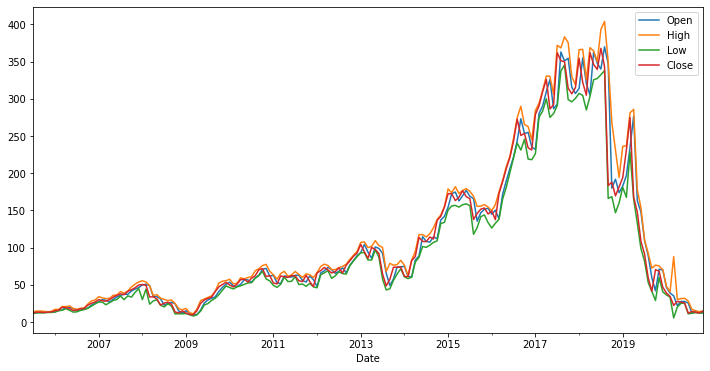

In [ ]:
stock_price = df.set_index('Date')

stock_price.plot.line(figsize = (12,6))


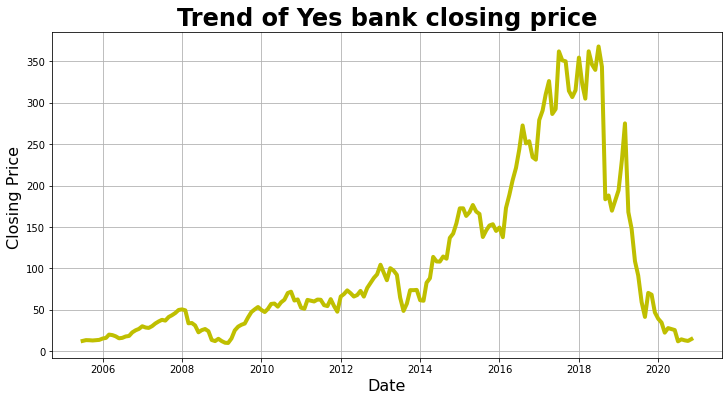

In [ ]:
plt.figure(figsize = (12,6))
plt.grid(True)
plt.title('Trend of Yes bank closing price',fontweight = 'bold',fontsize=24)
plt.plot(df['Date'],df['Close'],color='y',linewidth=4)
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Price ',fontsize = 16)
plt.show()

After 2018 there is sudden fall in the stock closing price. 

It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks.



---



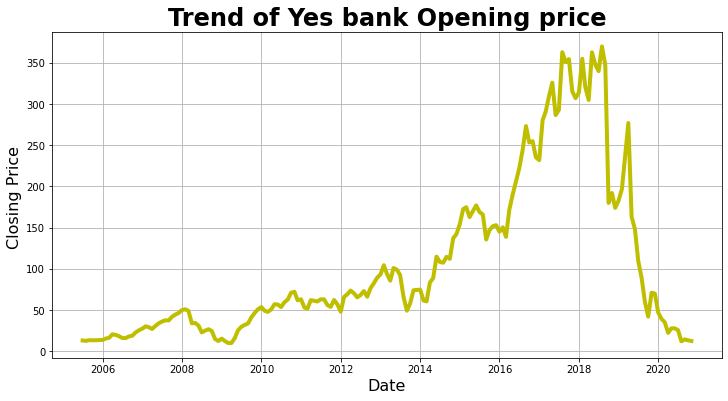

In [ ]:
plt.figure(figsize = (12,6))
plt.grid(True)
plt.title('Trend of Yes bank Opening price',fontweight = 'bold',fontsize=24)
plt.plot(df['Date'],df['Open'],color='y',linewidth=4)
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Price ',fontsize = 16)
plt.show()



So here in this graph, we can observe that the graph for Yes bank opening price and Yes bank closing price has nearly same result.

 Opening price also started increasing in year 2014 and it was at peak in year 2018. But after 2018 it started falling down contineously .


---





---


### **Now,**

WE WILL TAKE A LOOK AT **DISTRIBUTION PLOTS** .

In [ ]:
#copying data to preserve orignal file
df1= df.copy()

In [ ]:
# Dipendant and Indipendant Variables
indep_var=df1[['High','Low','Open']]
dep_var=df1['Close']

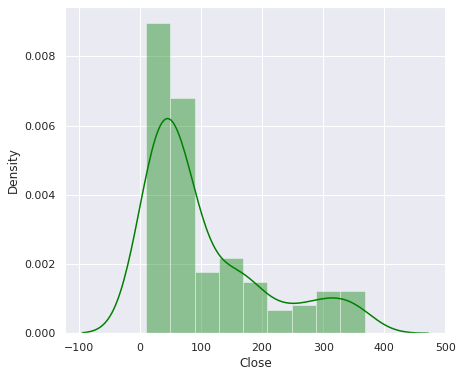

In [ ]:
# DIPENDANT VARIABLE

plt.figure(figsize=(15,6))
sns.set()
plt.subplot(1, 2, 1)
fig = sns.distplot(df1['Close'],color='green')

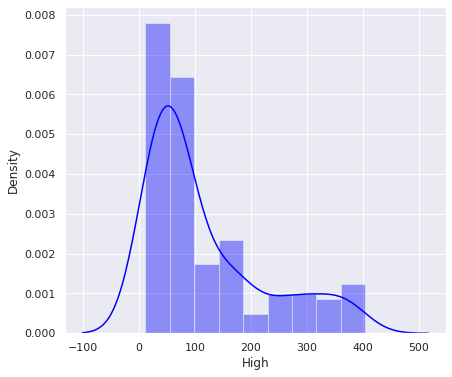

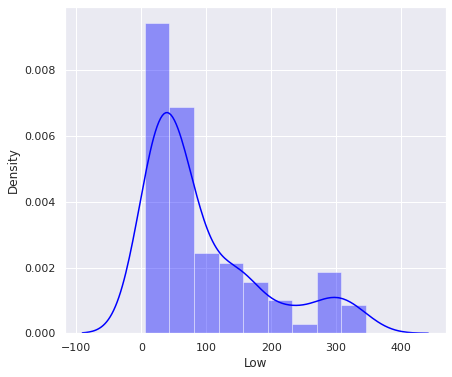

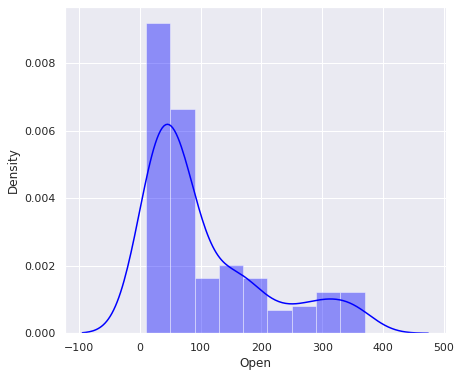

In [ ]:
# INDIPENDANT VARIABLES

for var in indep_var:
    plt.figure(figsize=(15,6))
    sns.set()
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df1[var],color='blue')
    fig.set_ylabel('Density')
    fig.set_xlabel(var)

### **LOG TRANSFORMATION**

---
### The distribution is rightly skewed distribution. It may lead us to misleading results in view of statistical hyposthesis. It can be corrected by applying Log Transformation then we'll have a look how this data behave.

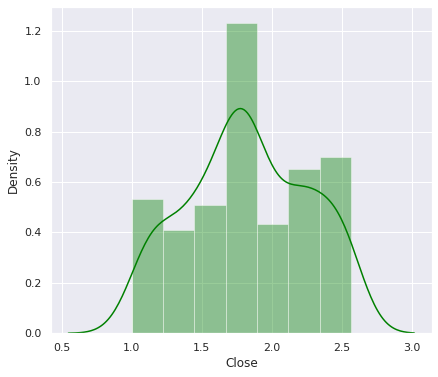

In [ ]:
# DIPENDANT VARIABLE

plt.figure(figsize=(15,6))
sns.set()
plt.subplot(1, 2, 1)
fig = sns.distplot(np.log10(df1['Close']),color ='green')

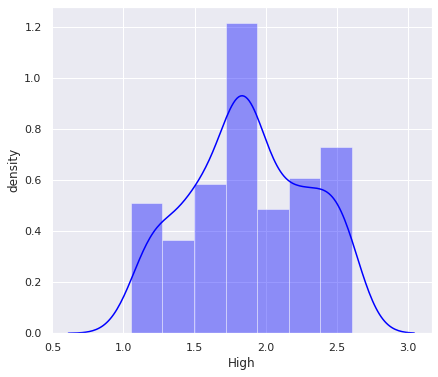

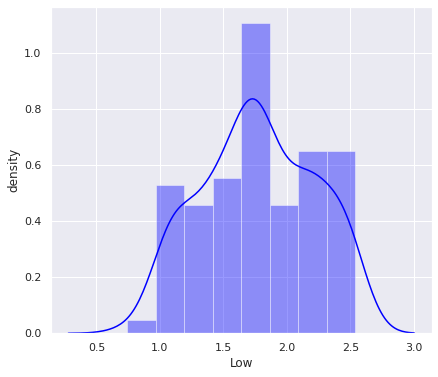

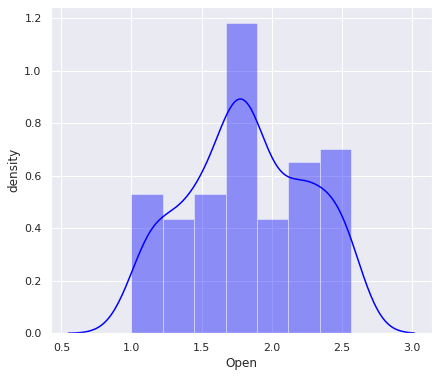

In [ ]:
# INDIPENDENT VARIABLE

for var in indep_var:
    plt.figure(figsize=(15,6))
    sns.set()
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df1[var]),color ='blue')
    fig.set_ylabel('density')
    fig.set_xlabel(var)



---


### NOW,
###  **CHECKING THE CORELATION WITH INDIPENDANT VARIABLE**

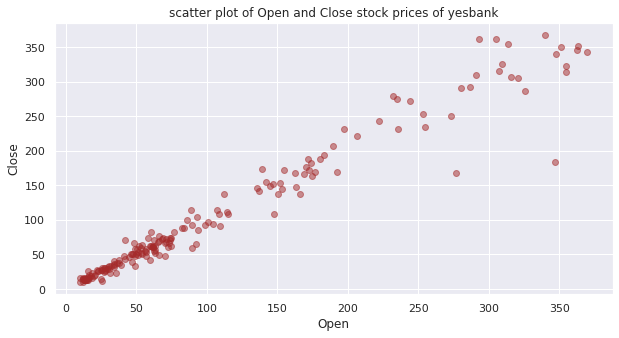

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(df1['Open'],df1['Close'],alpha = 0.5,color="brown")
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

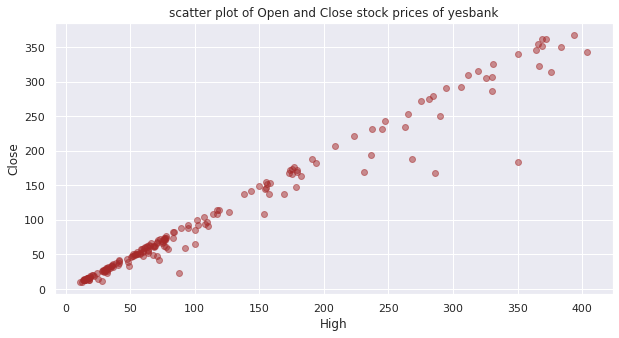

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(df1['High'],df1['Close'],alpha = 0.5,color="brown")
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

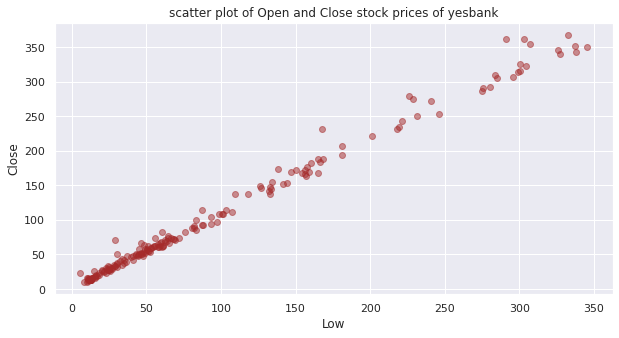

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(df1['Low'],df1['Close'],alpha = 0.5,color="brown")
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()


###  In all above scatter plots we can conclude that  high correlation of close price with other features.

---





---

**NOW**,
## **Cheking** **the** **Correlation** **using Heatmap** 

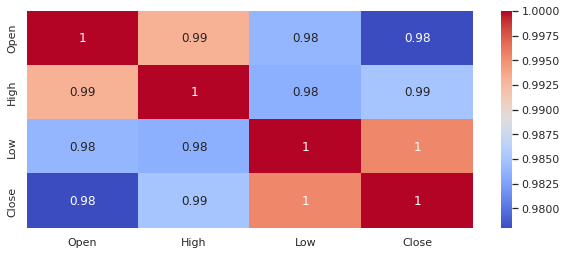

In [ ]:
plt.figure(figsize=(10,4))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')
plt.show()

### All independent variable is showing high relation with target/dependent variable.


---





---

NOW,
# **Checking Multicollinearity**



**To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)**

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. 
A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

In [ ]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

calculate_vif(df1[[i for i in df1.describe().columns if i not in ['Date', 'Close']]])


,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [ ]:
#Checking VIF without Date and Open features
calculate_vif(df1[[i for i in df.describe().columns if i not in ['Date','Open', 'Close']]])


,variables,VIF
0,High,62.598129
1,Low,62.598129


In [ ]:
#Checking VIF without Date and High features
calculate_vif(df1[[i for i in df.describe().columns if i not in ['Date','High', 'Close']]])

,variables,VIF
0,Open,65.64384
1,Low,65.64384


In [ ]:
#Checking VIF without Date and Low features
calculate_vif(df1[[i for i in df.describe().columns if i not in ['Date','Low', 'Close']]])

,variables,VIF
0,Open,153.215921
1,High,153.215921


 

* Since we have checked VIF with dropping each features(Open,High & Low) one by 

* one,better result of VIF was when we dropped 'Open' which was also realtively high.

* Even dropping any one feature the VIF was high. This is because of all features are highly correlated and they are equally important for closing price prediction so we are not going to dropp any column.

* As we have limited features, dropping any one of them will result in loss of important data which are essential for accurate model prediction and it will result in bad model. 
 
* Finally we will not dropp any column and will try to predict result and will see how model is performing with multicollinearity.


---




 




---  



# **We will build total 5 regression models for our DataSet**

*** Linear Regression.**
*** Lasso Regression.**
***  Ridge Regression.**
***  Elastic Net Regression**
***  XG Boost Regression.**


---



### **Lets split our Data in two parts,**

*  The train_test_split() method is used to split our data into train and test sets. 
*  **Train set**: The training dataset is a set of data that was utilized to fit the model. The dataset on which the model is trained. This data is seen and learned by the model.
*  **Test set**: The test dataset is a subset of the training dataset that is utilized to give an accurate evaluation of a final model fit.


1. Independent Variabes(x)
2. Dependent variable(y)

In [ ]:
X=df1.drop(columns=['Date','Close']).apply(zscore)
y=np.log10(df['Close'])

In [ ]:
#Creating Trainig and Testing set of our dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
#lets check the shape 
print('Shape of X_train Set:',X_train.shape)
print('Shape of X_test Set:',X_test.shape)
print('Shape of y_train Set:',y_train.shape)
print('Shape of y_test Set:',y_test.shape)

Shape of X_train Set: (148, 3)
Shape of X_test Set: (37, 3)
Shape of y_train Set: (148,)
Shape of y_test Set: (37,)


#  ***Linear Regression*** 
*  It's a supervised learning algorithm and the simplest form of regression used to study the mathematical relationship between variables.

In [ ]:
regressor=LinearRegression()
regressor_model=regressor.fit(X_train,y_train)

In [ ]:
#Checking the training accuracy of model
round(regressor.score(X_train,y_train),2)

0.81

In [ ]:
#Checking the testing accuracy of model
round(regressor.score(X_test,y_test),2)

0.83

In [ ]:
regressor.intercept_

1.8262354887187733

In [ ]:
regressor.coef_

array([-0.13212634,  0.2897523 ,  0.2329089 ])

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([1.53271165, 1.96685151, 1.61036375, 1.95591371, 1.66701732,
       1.53307377, 2.32010906, 1.47235081, 1.46198661, 2.27176343,
       2.59774191, 1.77196865, 2.00437373, 1.63989847, 2.73572843,
       2.44737489, 1.69461712, 1.51604264, 2.45270911, 1.61168007,
       1.44552783, 1.87477595, 2.01565305, 1.63782509, 2.25504837,
       1.63485715, 2.42543822, 1.46033686, 1.83193344, 1.62300074,
       2.8808576 , 2.77557818, 1.6959313 , 2.07184242, 1.56166337,
       1.59651659, 2.42252489])


Now,

we use **Evaluation Metrics** to measure the quality of the statistical or machine learning model.
There are many different types of evaluation metrics available to test a model.In this project we will mainly use following evaluation metrics:
* MSE(Mean Squared Error)
* RMSE(Root Mean Squared Error)
* MAE(Mean Absolute Error)
* MAPE(Mean Absolute Percentage Error)
* r2 score(R-Squared)

In [ ]:
#Checking the Test performance of Linear Regression Model.
print('MSE                :', round(mean_squared_error(y_test,y_pred),4))
print('RMSE               :',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('MAE                :',round(mean_absolute_error(y_test,y_pred),4))
print('MAPE               :',round(mean_absolute_percentage_error(y_test,y_pred),4))
print('r2 score           :',round(r2_score(y_test,y_pred),4))

MSE                : 0.032
RMSE               : 0.1788
MAE                : 0.1457
MAPE               : 0.087
r2 score           : 0.8283


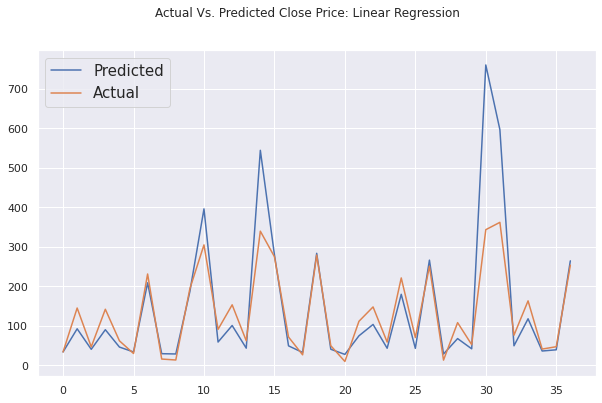

In [ ]:
# Actual vs Predicted 
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred))
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=12)
plt.show()

# ***Lasso Regression*** 

*  Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. 
*   Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. 

In [ ]:
#Implementing Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.005,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
#Checking Training accuracy of Lasso Regression
round(lasso.score(X_train,y_train),2)

0.81

In [ ]:
#Prediction
y_lasso_pred=lasso.predict(X_test)
y_lasso_pred

array([1.53982342, 1.97823908, 1.62548116, 1.95767329, 1.66470081,
       1.53363719, 2.32235872, 1.47847238, 1.46876749, 2.22294858,
       2.60987119, 1.7861935 , 2.00758923, 1.64592601, 2.74703432,
       2.40692503, 1.69761173, 1.51956762, 2.40621156, 1.61707252,
       1.45236177, 1.87145393, 2.01588969, 1.63777358, 2.24657485,
       1.60904717, 2.4268988 , 1.46756076, 1.83540354, 1.6337909 ,
       2.86112163, 2.69976573, 1.69183981, 2.07683305, 1.56527003,
       1.60275375, 2.4195457 ])

In [ ]:
# Checking the test performance of Lasso Regression Using Evaluation MAtrics

print("MSE                :",round(mean_squared_error(y_test, y_lasso_pred), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test, y_lasso_pred)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_lasso_pred),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_lasso_pred),4))
print("r2 score           :",round(r2_score(y_test, y_lasso_pred), 4))

MSE                : 0.0316
RMSE               : 0.1778
MAE                : 0.1463
MAPE               : 0.0876
r2 score           : 0.8303


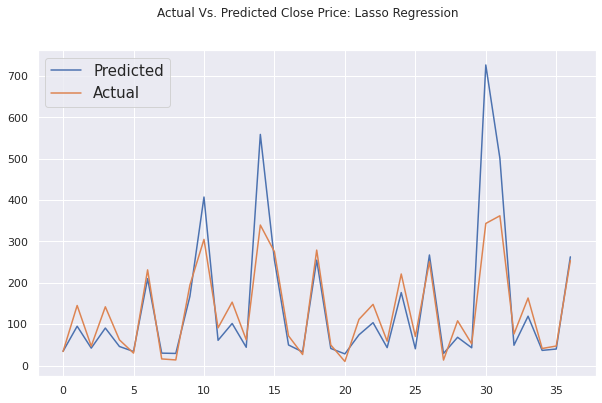

In [ ]:
#Plotting Actual vs Predicted for Lasso Regression
plt.figure(figsize=(10,6))
plt.plot(10**y_lasso_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=15)
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=12)
plt.show()

Now, we Impliment **Cross-Validation** on Lasso,

 It is one of the technique used to test the effectiveness of a machine learning models by dividing data into two segments: one used to learn or train a model and the other used to validate the model.If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.
It is also a re-sampling procedure used to evaluate a model if we have a limited data.


In [ ]:
#Hyperparameter of Tunning
from sklearn.model_selection import GridSearchCV
lasso_cv=Lasso()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso_cv,parameters,scoring='neg_mean_squared_error',cv=3)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " negative mean squared error : ", lasso_regressor.best_score_)

The best fit alpha value : {'alpha': 0.01}

Using  {'alpha': 0.01}  negative mean squared error :  -0.035688728899261


In [ ]:
#Prediction
y_lasso_pred1=lasso_regressor.predict(X_test)
y_lasso_pred1

array([1.54344655, 1.97574886, 1.62792097, 1.95546498, 1.66658191,
       1.53734661, 2.31506742, 1.48294886, 1.47337939, 2.21706107,
       2.59857361, 1.786389  , 2.0046854 , 1.64806852, 2.73381171,
       2.39846747, 1.69903218, 1.52347191, 2.39776704, 1.61961931,
       1.45720363, 1.87045394, 2.01288734, 1.64002954, 2.24033887,
       1.61172638, 2.41816589, 1.47218926, 1.83490372, 1.63610595,
       2.84633038, 2.68723576, 1.69334389, 2.07296877, 1.56853742,
       1.60549805, 2.41089359])

In [ ]:
#Test performance of Lasso after Cross-Validation

print("MSE                :",round(mean_squared_error(y_test, y_lasso_pred1), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test, y_lasso_pred1)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_lasso_pred1),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_lasso_pred1),4))
print("r2 score           :",round(r2_score(y_test, y_lasso_pred1), 4))

MSE                : 0.0315
RMSE               : 0.1775
MAE                : 0.1459
MAPE               : 0.0877
r2 score           : 0.8308


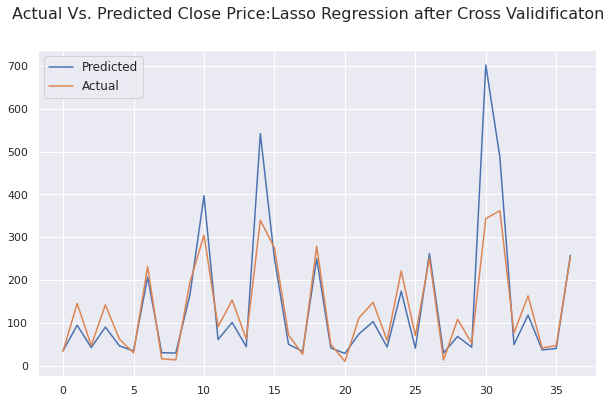

In [ ]:
#Plotting Actual vs Predicted for Lasso after Cross-Validation
plt.figure(figsize=(10,6))
plt.plot(10**y_lasso_pred1)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=12)
plt.suptitle('Actual Vs. Predicted Close Price:Lasso Regression after Cross Validificaton', fontsize=16) 
plt.show()

# ***Ridge Regression***
* Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. 
*  This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 


In [ ]:
#Implementing Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#Checking the training accuracy of Ridge Regression
round(ridge.score(X_train,y_train),2)

0.81

In [ ]:
#Prediction
y_ridge_pred=ridge.predict(X_test)
y_ridge_pred

array([1.5334622 , 1.96922127, 1.61250463, 1.95665066, 1.66639979,
       1.53267972, 2.32162939, 1.47283889, 1.46256774, 2.26399758,
       2.60150464, 1.77432706, 2.00545486, 1.64069108, 2.73980868,
       2.44149328, 1.69500926, 1.51615183, 2.44573491, 1.61227623,
       1.44606734, 1.8743713 , 2.01597983, 1.63755424, 2.25458459,
       1.62973976, 2.42679241, 1.46099548, 1.83266795, 1.62454272,
       2.87947192, 2.76400948, 1.69504053, 2.07329341, 1.56187277,
       1.5972619 , 2.42342024])

In [ ]:
#Checking the test performance of Ridge Regression Using Evaluation MAtrics
print("MSE                :",round(mean_squared_error(y_test, y_ridge_pred), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test, y_ridge_pred)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_ridge_pred),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_ridge_pred),4))
print("r2 score           :",round(r2_score(y_test, y_ridge_pred), 4))

MSE                : 0.0319
RMSE               : 0.1786
MAE                : 0.1453
MAPE               : 0.0869
r2 score           : 0.8288


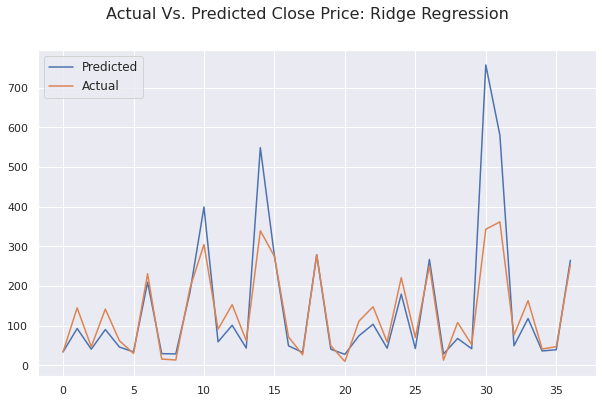

In [ ]:
#Plotting Actual vs Predicted for Ridge Regression
plt.figure(figsize=(10,6))
plt.plot(10**y_ridge_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=12)
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.show()

Now, we Impliment **Cross-Validation** on Ridge,

In [ ]:
#CrossValidation 
#Hyperparameter of Tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value :",ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " negative mean squared error : ", ridge_regressor.best_score_)

The best fit alpha value : {'alpha': 1}

Using  {'alpha': 1}  negative mean squared error :  -0.03559106404507476


In [ ]:
#Prediction after CV
y_ridge_pred1=ridge_regressor.predict(X_test)
y_ridge_pred1

array([1.53685109, 1.97890367, 1.62336467, 1.95852668, 1.66344078,
       1.53105213, 2.32657126, 1.47489651, 1.46506572, 2.23070238,
       2.61615325, 1.78538915, 2.00882057, 1.64391416, 2.75389879,
       2.41549977, 1.69619106, 1.51658252, 2.41536176, 1.61495446,
       1.44857737, 1.87222063, 2.01836956, 1.63608468, 2.25075001,
       1.61011666, 2.43301121, 1.46380564, 1.83524698, 1.63153741,
       2.8723522 , 2.71396422, 1.69102192, 2.07885344, 1.56271006,
       1.60032936, 2.42466269])

In [ ]:
# Checking the test performance of Ridge Regression after CrossValidation Using Evaluation MAtrics

print("MSE                :",round(mean_squared_error(y_test, y_ridge_pred1), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test, y_ridge_pred1)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_ridge_pred1),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_ridge_pred1),4))
print("r2 score           :",round(r2_score(y_test, y_ridge_pred1), 4))

MSE                : 0.0317
RMSE               : 0.1781
MAE                : 0.1464
MAPE               : 0.0874
r2 score           : 0.8298


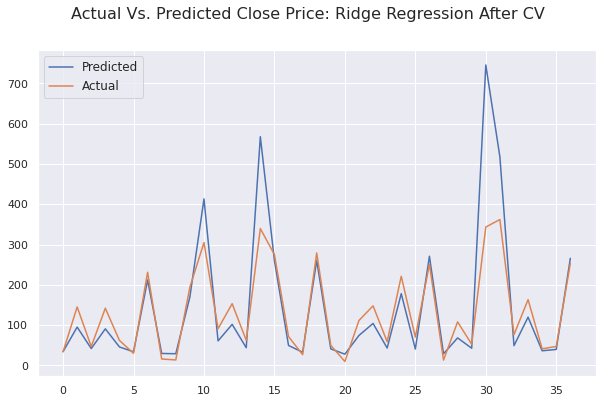

In [ ]:
#Plotting Actual vs Predicted for Ridge Regression after CrossValidation
plt.figure(figsize=(10,6))
plt.plot(10**y_ridge_pred1)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=12)
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.show()

# ***Elastic Net Regression***
*  Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models.   
*The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [ ]:
#Implementing Elastic Net Regression
from sklearn.linear_model import ElasticNet
elasticNet_reg=ElasticNet(alpha=0.1,l1_ratio=0.5)
elasticNet_reg.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#Checking training accuracy of ElasticNet Regression
round(elasticNet_reg.score(X_train,y_train),2)

0.79

In [ ]:
#Prediction
y_elasticNet_pred=elasticNet_reg.predict(X_test)
y_elasticNet_pred

array([1.57821253, 1.95877279, 1.66246747, 1.93294061, 1.68007429,
       1.56910095, 2.2488902 , 1.52362346, 1.51568508, 2.14267329,
       2.50403119, 1.79883792, 1.9770972 , 1.66851515, 2.61542647,
       2.30377118, 1.71063839, 1.55799923, 2.30125173, 1.64426503,
       1.50218845, 1.85878264, 1.99144153, 1.65784124, 2.17658379,
       1.6298757 , 2.34692393, 1.51478462, 1.83031628, 1.66252591,
       2.70731868, 2.54151723, 1.70317981, 2.04048248, 1.59765644,
       1.63129602, 2.32676717])

In [ ]:
#Checking the test performance of ElasticNet Regression Using Evaluation MAtrics
print("MSE                :",round(mean_squared_error(y_test, y_elasticNet_pred), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test, y_elasticNet_pred)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_elasticNet_pred),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_elasticNet_pred),4))
print("r2 score           :",round(r2_score(y_test, y_elasticNet_pred), 4))

MSE                : 0.0344
RMSE               : 0.1854
MAE                : 0.1514
MAPE               : 0.0924
r2 score           : 0.8155


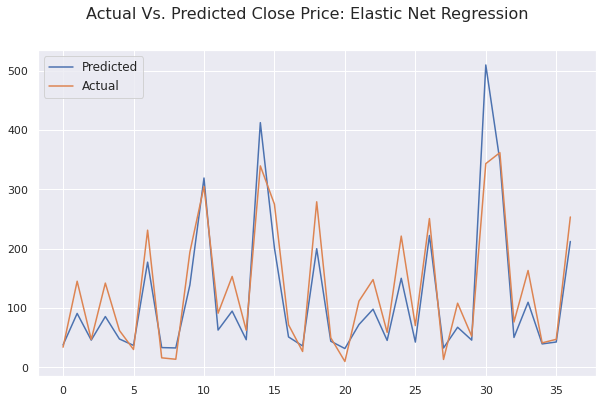

In [ ]:
#Plotting Actual vs Predicted for ElasticNet Regression 
plt.figure(figsize=(10,6))
plt.plot(10**y_elasticNet_pred)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=12)
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net Regression', fontsize=16)
plt.show()

Now, we Impliment **Cross-Validation** 

In [ ]:
elastic=ElasticNet()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regg=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value :" ,elastic_regg.best_params_)
print("\nUsing ",elastic_regg.best_params_, " the negative mean squared error : ", elastic_regg.best_score_)

The best fit alpha value : {'alpha': 0.01, 'l1_ratio': 0.4}

Using  {'alpha': 0.01, 'l1_ratio': 0.4}  the negative mean squared error :  -0.035176857455740486


In [ ]:
#Prediction
y_pred_elastic=elastic_regg.predict(X_test)
y_pred_elastic

array([1.53981924, 1.97789384, 1.62619228, 1.95700143, 1.66454946,
       1.53364021, 2.32156191, 1.47836527, 1.46867459, 2.22346746,
       2.60905078, 1.78654716, 2.00691477, 1.64576168, 2.74523429,
       2.40697321, 1.69731297, 1.51948847, 2.40647802, 1.6170668 ,
       1.45236609, 1.8712765 , 2.01642149, 1.63759912, 2.24573652,
       1.61049157, 2.42715514, 1.46745295, 1.83507555, 1.63386956,
       2.86079654, 2.700361  , 1.69176665, 2.07646422, 1.56518211,
       1.6026081 , 2.41827787])

In [ ]:
#Checking the test performance of ElasticNet Regression after CrossValidation Using Evaluation MAtrics
print("MSE                :",round(mean_squared_error(y_test, y_pred_elastic), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test, y_pred_elastic)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_pred_elastic),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),4))
print("r2 score           :",round(r2_score(y_test, y_pred_elastic), 4))

MSE                : 0.0316
RMSE               : 0.1778
MAE                : 0.1462
MAPE               : 0.0876
r2 score           : 0.8304


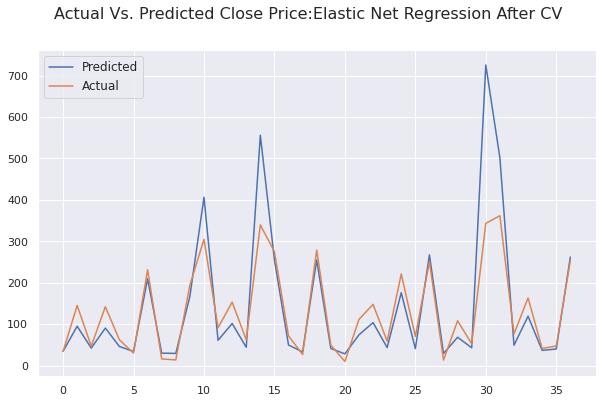

In [ ]:
#Plotting Actual vs Predicted for ElasticNet Regression after CrossValidation
plt.figure(figsize=(10,6))
plt.plot(10**y_pred_elastic)
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=12)
plt.suptitle('Actual Vs. Predicted Close Price:Elastic Net Regression After CV', fontsize=16)
plt.show()

# ***XG Boost Regression***
*  XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. 
*It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
from xgboost import XGBRegressor
xgb_regg=XGBRegressor()
xgb_regg.fit(X_train,y_train)

[18:59:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Checking the training accuracy of XGBoost Regression
xgb_regg.score(X_train,y_train)

0.9988205134404344

In [ ]:
#Prediction
y_xgb_pred=xgb_regg.predict(X_test)
y_xgb_pred

array([1.5194211, 2.1900845, 1.6454632, 2.1556144, 1.8316978, 1.4945303,
       2.3724983, 1.2645369, 1.113234 , 2.3066907, 2.4867573, 1.9709127,
       2.1900845, 1.7710928, 2.5382118, 2.3859832, 1.8611531, 1.4418074,
       2.3859832, 1.7219924, 1.0344707, 2.1381845, 2.1974554, 1.7706577,
       2.3727498, 1.5995123, 2.4354072, 1.0987997, 2.034106 , 1.7386808,
       2.5431259, 2.501274 , 1.840231 , 2.2336407, 1.5969503, 1.7174263,
       2.4369502], dtype=float32)

In [ ]:
#Checking the test performance of XGBoost Regression Using Evaluation MAtrics
print("MSE                :",round(mean_squared_error(y_test, y_xgb_pred), 4))
print("RMSE               :",round(np.sqrt(mean_squared_error(y_test,y_xgb_pred)),4))
print("MAE                :",round(mean_absolute_error(y_test, y_xgb_pred),4))
print("MAPE               :",round(mean_absolute_percentage_error(y_test, y_xgb_pred),4))
print("r2 score           :",round(r2_score(y_test, y_xgb_pred), 4))

MSE                : 0.0027
RMSE               : 0.0518
MAE                : 0.0316
MAPE               : 0.0174
r2 score           : 0.9856


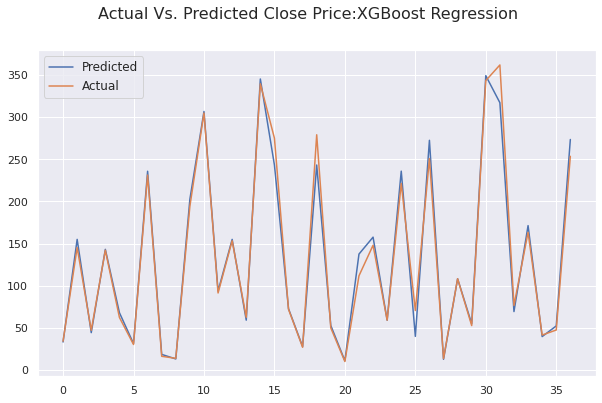

In [ ]:
#Plotting Actual vs Predicted for XGBoost Regression
plt.figure(figsize=(10,6))
plt.plot(10**y_xgb_pred)  
plt.plot(10**(np.array(y_test)))
plt.legend(['Predicted','Actual'],fontsize=12)
plt.suptitle('Actual Vs. Predicted Close Price:XGBoost Regression', fontsize=16)
plt.show()



---



---


# **CONCLUSION**
*   In EDA part we conclude from our dataset that

    *   Stock close prise decreased after year 2018 it is mainly because of Rana Kapoor case and hitted the stock price badly.
    *   The graph for Yes bank opening price and Yes bank closing price has same result.
    *    The point that the stock price of the YES BANK falls down after the year 2018 and it is not beneficial for investors to invest their money.
    *  From scatter plot we can conclude that bivariate analysis shows high correlation of close price with other features.
    *   All DIST plot shows that all are right skewed.
    *  From heatmap we can conclude that all the features showing high correlation between each other. 


*   After that we visualise the performance of our linear regression model and the graph shows that we achieve the almost best fit model for our dataset.

*  The Target Variable is Strongly dipendant on Indipendant Variable. 

*   Stock Price prediction with the help of Machine Learning models is less time consuming and also it gives good performance.

*   Stock price was continuously increasing till 2018 after that it decreases due to fraud case of Rana Kapoor.
*   All independent variables (Open,High& Low) are extremely correlated with dependent variable(Close).
*   All independent variables are highly correlated with each other(Multicollinearity)

*   Distribution of all independent and dependent variables was right skewed and after log transformation it became Normal.

*   Compared 5 models(**Linear Regression,Lasso Regression, Ridge Regression, Elastic Net Regression, and XGBoost Regression**) on the basis of **RMSE** and **MAPE**.
*   **RMSE** and **MAPE** are mostly used  as evaluatuion metrics to measure **forecast accuracy**.

*  **XGBoost Regression** is best model among all five models with lowest **RMSE=0.0518**, and **MAPE=0.0174** than other models and also it has highest **r2 score**(**r2 score=0.9856**) than other models.






